## Nama : Fachmi Maris
Batch : 002

In [83]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "grand-brand-364407" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [84]:
df = client.query('''
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
''').to_dataframe()

In [85]:
df

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,5,3,Shipped,F,2019-11-21 16:23:00+00:00,NaT,2019-11-23 04:58:00+00:00,NaT,1
1,7,4,Shipped,F,2022-03-13 18:43:00+00:00,NaT,2022-03-16 06:52:00+00:00,NaT,1
2,15,11,Shipped,F,2019-05-28 11:02:00+00:00,NaT,2019-05-29 05:00:00+00:00,NaT,2
3,22,16,Shipped,F,2020-03-15 10:43:00+00:00,NaT,2020-03-17 17:20:00+00:00,NaT,2
4,26,20,Shipped,F,2022-04-01 18:50:00+00:00,NaT,2022-04-03 11:25:00+00:00,NaT,1
...,...,...,...,...,...,...,...,...,...
124836,124809,99975,Processing,M,2020-01-19 13:24:00+00:00,NaT,NaT,NaT,1
124837,124810,99975,Processing,M,2022-10-10 13:24:00+00:00,NaT,NaT,NaT,1
124838,124811,99976,Processing,M,2022-10-22 09:37:47.283889+00:00,NaT,NaT,NaT,1
124839,124821,99983,Processing,M,2021-05-06 08:07:00+00:00,NaT,NaT,NaT,1


## 1. Berapa jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022? Insight apa yang bisa kamu berikan?

In [100]:
no_1_transaksi_complete = client.query('''
SELECT year, month, transaksi_compelete,
case when month between 1 and 3 then'Q1'
when month between 4 and 6 then 'Q2'
when month between 7 and 9 then 'Q3'
end as quarter
from (select 
extract(year from created_at) as year,
extract(month from created_at) as month,
COUNT(created_at) as transaksi_compelete
FROM `bigquery-public-data.thelook_ecommerce.order_items`
where status= 'Complete'  and created_at >= '2022-01-01' and  created_at <= '2022-09-30'
group by year, month
order by month)

''').to_dataframe()

In [102]:
no_1_transaksi_complete

,year,month,transaksi_compelete,quarter
0,2022,1,1545,Q1
1,2022,2,1528,Q1
2,2022,3,1862,Q1
3,2022,4,1926,Q2
4,2022,5,2062,Q2
5,2022,6,2314,Q2
6,2022,7,2545,Q3
7,2022,8,2958,Q3
8,2022,9,3344,Q3


Berdasarkan dataframe status_complete quarter 3 memiliki transaksi complate tertinggi dibandingkan quarter 1 dan quarter 2. Bisa ditarik kesimpulan daya beli user meningkat di atas pertengahan tahun, sehingga para penjual dapat meningkatkan strategi marketing dan produksi untuk memenuhi kebutuhan pasar. Trend yang terjadi tiap bulan selalu naik meskipun di quarter 1 sempat mengalami penurunan jumlah user. 

## 2. Berikan informasi total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022! (Hanya yang transaksi berstatus Complete. Apa informasi yang bisa kamu sampaikan?

In [88]:
no_2_Penjualan_complete = client.query('''
SELECT year, month, total_penjualan_USD,
case when month between 1 and 3 then'Q1'
when month between 4 and 6 then 'Q2'
when month between 7 and 9 then 'Q3'
end as quarter

FROM (SELECT round(sum(sale_price)) as total_penjualan_USD,
EXTRACT(year From items.created_at ) AS year,
EXTRACT(month From items.created_at ) AS month,

FROM `bigquery-public-data.thelook_ecommerce.order_items` as items
join bigquery-public-data.thelook_ecommerce.inventory_items as inventory
on inventory.product_id = items.product_id
where items.status='Complete' and items.created_at >= '2022-01-01' and items.created_at<='2022-09-30'
group by year,month
order by year,month)
''').to_dataframe()



In [89]:
no_2_Penjualan_complete

,year,month,total_penjualan_USD,quarter
0,2022,1,1826291.0,Q1
1,2022,2,1948094.0,Q1
2,2022,3,2192073.0,Q1
3,2022,4,2401047.0,Q2
4,2022,5,2412508.0,Q2
5,2022,6,2729557.0,Q2
6,2022,7,2991729.0,Q3
7,2022,8,3488360.0,Q3
8,2022,9,4120957.0,Q3


Berdasarkan dataframe Penjualan_complete, quarter 3 memiliki total penjualan tertinggi dibandingkan quarter 1 dan quarter 2 terutama di akhir quarter 3. Bisa ditarik kesimpulan bahwa mulai bulan Juli total penjualan dalam (USD) meningkat dibandingkan pada awal tahun. Trend yang terjadi berdasarkan data tersebut menyatakan bahwa setiap bulan bahkan setiap quarter selalu mengalami kenaikan tanpa penurunan.

## 3.Berapa user yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022? Apa kesimpulanmu?

In [90]:
no_3_user_complete = client.query('''
SELECT year,month,total_user,
case when month between 1 and 3 then'Q1'
when month between 4 and 6 then 'Q2'
when month between 7 and 9 then 'Q3'
end as Quarter

FROM (SELECT count( distinct (user_id)) as total_user,
EXTRACT(year From created_at ) AS year,
EXTRACT(month From created_at ) AS month,
FROM `bigquery-public-data.thelook_ecommerce.order_items`
where status='Complete' and created_at >= '2022-01-01' and  created_at<='2022-09-30'
group by year,month
order by year,month)  
''').to_dataframe()


In [91]:
no_3_user_complete

,year,month,total_user,Quarter
0,2022,1,1102,Q1
1,2022,2,1085,Q1
2,2022,3,1301,Q1
3,2022,4,1346,Q2
4,2022,5,1485,Q2
5,2022,6,1591,Q2
6,2022,7,1786,Q3
7,2022,8,2075,Q3
8,2022,9,2294,Q3


Berdasarkan data untuk user yang melakukan transaksi sampai complete dapat disumplkan bahwa bulan kedua memiliki total user terkecil dibanding bulan lain namun, sejak akhir Q1 sama akhir Q3 total user mengalami kenaikan jumlah secara signifikan.


## 4.Kategori produk apa saja yang paling banyak dibeli (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

In [92]:
no_4_category_terbanyak_dibeli = client.query('''
SELECT year, month, kategori_terbanyak, jumlah_produk,
case when month between 1 and 3 then'Q1'
when month between 4 and 6 then 'Q2'
when month between 7 and 9 then 'Q3'
end as Quarter
From (Select *,
row_number() over(partition by month order by jumlah_produk DESC) as rank
FROM (SELECT
EXTRACT(year From items.created_at) AS year,
EXTRACT(month From items.created_at) AS month,
inventory.product_category as kategori_terbanyak,
count(items.product_id) as jumlah_produk
FROM bigquery-public-data.thelook_ecommerce.inventory_items as inventory
join bigquery-public-data.thelook_ecommerce.order_items as items
on inventory.product_id = items.product_id
where items.status='Complete' and items.created_at >= '2022-01-01' and  items.created_at<='2022-09-30'
group by year, month, kategori_terbanyak
order by year,month))
where rank = 1 
order by month
''').to_dataframe()

In [93]:
no_4_category_terbanyak_dibeli

,year,month,kategori_terbanyak,jumlah_produk,Quarter
0,2022,1,Tops & Tees,2523,Q1
1,2022,2,Jeans,2275,Q1
2,2022,3,Intimates,3021,Q1
3,2022,4,Jeans,2934,Q2
4,2022,5,Jeans,3180,Q2
5,2022,6,Shorts,3456,Q2
6,2022,7,Jeans,3641,Q3
7,2022,8,Fashion Hoodies & Sweatshirts,4247,Q3
8,2022,9,Tops & Tees,5267,Q3


Berdasarkan data untuk kategori terbanyak dibeli setiap bulannya, kategori Tops & Tees menjadi kategori terbanyak 2 kali, kategori jeans menjadi terbanyak 4 kali, dan intimates, Shorts serta Fashion Hoodies & Sweatshirts menjadi kategori terbanyak 1 kali. Kategori terbanyak menunjukan produk ini terlaris dibanding produk lainnya sehingga layak dilakukan pemasaran lebih tinggi untuk menjangkau pasar yang lebih luas.

## 5. Kategori produk apa saja yang paling banyak mendapatkan pendapatan (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022? Berikan insight!

In [94]:
no_5_Pendapatan_terbanyak = client.query('''
SELECT year, month, kategori, jumlah_pendapatan,
case when month between 1 and 3 then'Q1'
when month between 4 and 6 then 'Q2'
when month between 7 and 9 then 'Q3'
end as Quarter
From (Select *,
row_number() over(partition by month order by jumlah_pendapatan DESC) as rank
FROM (SELECT
EXTRACT(year From items.created_at) AS year,
EXTRACT(month From items.created_at) AS month,
inventory.product_category as kategori,
round(sum(items.sale_price)) as jumlah_pendapatan
FROM bigquery-public-data.thelook_ecommerce.inventory_items as inventory
join bigquery-public-data.thelook_ecommerce.order_items as items
on inventory.product_id = items.product_id
where items.status='Complete' and items.created_at >= '2022-01-01' and  items.created_at<='2022-09-30'
group by year, month, kategori
order by year,month))
where rank = 1 
order by month
''').to_dataframe()

In [95]:
no_5_Pendapatan_terbanyak

,year,month,kategori,jumlah_pendapatan,Quarter
0,2022,1,Outerwear & Coats,271040.0,Q1
1,2022,2,Outerwear & Coats,263458.0,Q1
2,2022,3,Outerwear & Coats,362485.0,Q1
3,2022,4,Outerwear & Coats,403363.0,Q2
4,2022,5,Jeans,345941.0,Q2
5,2022,6,Outerwear & Coats,371969.0,Q2
6,2022,7,Outerwear & Coats,474448.0,Q3
7,2022,8,Outerwear & Coats,420152.0,Q3
8,2022,9,Outerwear & Coats,576958.0,Q3


Berdasarkan data untuk soal nomor 5, diperoleh kesimpulan bahwa kategori Outerwear & Coats hampir selalu memiliki pendapatan tertinggi setiap bulannya kecuali di pertengahan Q2 yang didominasi oleh kategori jeans.Jumlah pendapatan tiap bulannya mengalami fluktuatif namun cenderung naik. terjadi penurunan 3 kali dalam 3 quarter yaitu bulan kedua,kelima, dan kedelapan.
kategori Outerwear & Coats bisa dipastikan menjadi kategori yang sangat layak diperhitungkan dalam mencari pendapatan untuk perusahaan.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
no_1_transaksi_complete['total_penjualan_USD']=no_2_Penjualan_complete['total_penjualan_USD']
no_1_transaksi_complete['total_user']= no_3_user_complete['total_user']


In [104]:
jawaban_no_6 = no_1_transaksi_complete
jawaban_no_6

,year,month,transaksi_compelete,quarter,total_penjualan_USD,total_user
0,2022,1,1545,Q1,1826291.0,1102
1,2022,2,1528,Q1,1948094.0,1085
2,2022,3,1862,Q1,2192073.0,1301
3,2022,4,1926,Q2,2401047.0,1346
4,2022,5,2062,Q2,2412508.0,1485
5,2022,6,2314,Q2,2729557.0,1591
6,2022,7,2545,Q3,2991729.0,1786
7,2022,8,2958,Q3,3488360.0,2075
8,2022,9,3344,Q3,4120957.0,2294


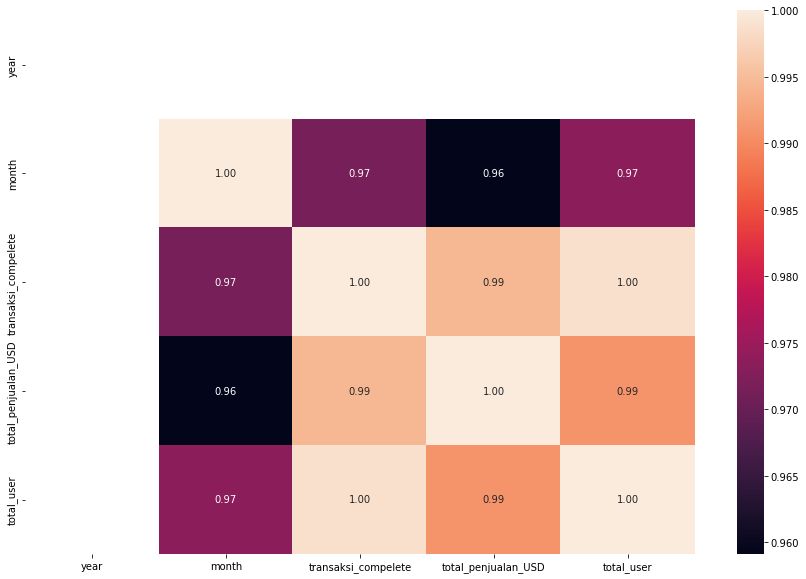

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(jawaban_no_6.corr(), annot=True, fmt='.2f')
plt.show()

Jumlah total user sangat berkaitan dengan jumlah transaksi complete karena nilai korelasinya bernilai 1 ,sedangkan jumlah total user dengan total penjualan nilai kaitannya adalah 0.99. Kesimpulannya adalah total user lebih berkaitan dengan jumlah transaksi dibandingkan jumlah penjualan

## POIN ANALISIS

1.Berikan kesimpulan dari laporan/informasi yang dibuat berdasarkan problem statement/poin penjabaran menggunakan bahasa awam! (boleh dalam beberapa paragraf)

Kesimpulan laporan evaluasi aktivitas penjualan di platform e-commerce The Look adalah dari Q1 sampai Q3 hampir selalu mengalami kenaikan di setiap perhitungan seperti totak user, transaksi compelete, jumlah produk dengan kategori terbanyak, jumlah total pendapatan dalam USD, dan pendapatan tertinggi dari kategori tertentu.Bulan kedua cenderung memiliki nilai yang paling kecil atau mengalami penurunan dibanding bulan sebelumnya karena pada bulan Februari hanya terdapat 28 hari dalam sebulan sedangkan bulan lain bisa sampai 30 bahkan 31 hari. Meskipun ada penurunan di bulan tertentu namun secara keseluruhan trend perhitungan cenderung mengalami kenaikan terutama di Q3. Jumlah user dan transaksi complete sangat berkaitan nilainya sesuai dengan tabel Feature Engineering.

## POIN PERTANYAAN

1. Apakah problem statement yang kamu definisikan di awal dapat terukur ketercapaiannya? berikan pendapatmu!
2. Berdasarkan hasil analisis yang sudah kamu lakukan dari 6 penjabaran di atas, jika CEO perusahaanmu ingin menargetkan pendapatan di awal kuartal 4 harus mencapai $250000, apakah masuk akal?
3. CEO kamu menargetkan di kuartal 4 ada investor yang dapat menyuntikan dana ke perusahaanmu, dimana investor akan melihat GMV selama 3 kuartal terakhir serta prospek kedepan minimal di kuartal 4 akan seperti apa. Berikan informasi kepada CEO mu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV 3 kuartal terakhir, apakah perusahaanmu layak atau tidak mendapatkan investor baru!

## POIN JAWABAN

1. Problem statement berdasarkan SMART goal yang saya tentukan adalah :
 
Data analis di The Look merekomendasikan 2 kategori yang layak ditingkatkan penjualannya berdasarkan laporan evaluasi aktivitas penjualan untuk penjualan di Q4.

2 kategori tersebut adalah Outerwear & Coats dan Jeans. Selama Q1 sampai Q3 Outerwear & Coats menghasilkan pendapatan sebesar 3.143.873 dollar dan Jeans terjual sebanyak 12.030 pcs. 

Problem sloving yang saya dapat tawarkan adalah Tim marketing dan tim produksi dapat berkolaborasi serta bersinergi untuk memperluas pasar online dan meningkatkan lalu memenuhi demand pasar. Perusahaan dapat menambah variasi.

2. Berdasarkan hasil analisis 6 penjabaran di atas, maka sebagai data analis saya menyatakan untuk mencapai 250.000 dollar di Q4 sangat memunginkan karena berdasarkan tabel total penjualan di Q3 mencapai 4.120.957 dollar
bahkan untuk kategori Outerwear & Coats di akhir Q3 mencapai  $576.958 dollar

3.  Berdasarkan hasil analisis 6 penjabaran di atas, GMV dari Q1 sampai Q3 dapat dilihat di tabel no_2_Penjualan_complete yang berisi total penjualan. Dilihat dari total penjualan maka trend penjualan cenderung naik di setiap bulannya.
Berdasarkan laporan evaluasi aktivitas penjualan maka wajar apabila investor akan tertarik untuk berinvestasi. Namun sebagai data analis, saya belum menyarankan untuk menerima dana investor di awal Q4 karena perusahaan dalam keadaan baik dan stabil secara finansial dan penjualan sehingga belum perlu berbagi keuntungan dengan para investor.
Dana investor akan sangat layak diterima untuk memasuki Q1 di awal tahun baru dengan berbagai promosi ,diskon, dan perluasan market bahkan layak dipertimbangkan untuk membuat desain baru untuk kategori yang layak seperti jeans dan Outerwear & Coats.  
